In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **데이터 살펴보기**

In [ ]:
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

In [ ]:
# 경로 설정
import os
os.chdir('/content/drive/My Drive/Semi-project_01')

In [31]:
#파일 불러오기
train = pd.read_csv('open/train.csv', encoding = 'utf-8')
test = pd.read_csv('open/test_x.csv', encoding = 'utf-8')
sample_submission = pd.read_csv('open/sample_submission.csv', encoding = 'utf-8')

In [ ]:
#train 데이터 살펴보기
train

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3
...,...,...,...
54874,54874,"“Is that you, Mr. Smith?” odin whispered. “I h...",2
54875,54875,"I told my plan to the captain, and between us ...",4
54876,54876,"""Your sincere well-wisher, friend, and sister...",1
54877,54877,“Then you wanted me to lend you money?”,3


In [ ]:
#test 데이터 살펴보기
test

,index,text
0,0,“Not at all. I think she is one of the most ch...
1,1,"""No,"" replied he, with sudden consciousness, ""..."
2,2,As the lady had stated her intention of scream...
3,3,“And then suddenly in the silence I heard a so...
4,4,His conviction remained unchanged. So far as I...
...,...,...
19612,19612,"At the end of another day or two, odin growing..."
19613,19613,"All afternoon we sat together, mostly in silen..."
19614,19614,"odin, having carried his thanks to odin, proc..."
19615,19615,"Soon after this, upon odin's leaving the room,..."


In [ ]:
#sample_submission
sample_submission

,index,0,1,2,3,4
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,2,0,0,0,0,0
3,3,0,0,0,0,0
4,4,0,0,0,0,0
...,...,...,...,...,...,...
19612,19612,0,0,0,0,0
19613,19613,0,0,0,0,0
19614,19614,0,0,0,0,0
19615,19615,0,0,0,0,0


# **전처리**

In [ ]:
train.loc[2, 'text']

' She was engaged one day as she walked, in perusing Jane’s last letter, and dwelling on some passages which proved that Jane had not written in spirits, when, instead of being again surprised by Mr. odin, she saw on looking up that odin was meeting her. Putting away the letter immediately and forcing a smile, she said:'

In [ ]:
#부호를 제거해주는 함수
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9]', '', text)

train['text']=train['text'].apply(alpha_num)

In [ ]:
#부호가 사라진 것을 확인할 수 있습니다.
train

,index,text,author
0,0,He was almost choking There was so much so muc...,3
1,1,Your sister asked for it I suppose,2
2,2,She was engaged one day as she walked in peru...,1
3,3,The captain was in the porch keeping himself c...,4
4,4,Have mercy gentlemen odin flung up his hands D...,3
...,...,...,...
54874,54874,Is that you Mr Smith odin whispered I hardly d...,2
54875,54875,I told my plan to the captain and between us w...,4
54876,54876,Your sincere wellwisher friend and sister LUC...,1
54877,54877,Then you wanted me to lend you money,3


In [ ]:
# 이상치 제거
train = train[train.text != "     "]
train = train.reset_index(drop=True)
train

,index,text,author
0,0,He was almost choking There was so much so muc...,3
1,1,Your sister asked for it I suppose,2
2,2,She was engaged one day as she walked in peru...,1
3,3,The captain was in the porch keeping himself c...,4
4,4,Have mercy gentlemen odin flung up his hands D...,3
...,...,...,...
54831,54874,Is that you Mr Smith odin whispered I hardly d...,2
54832,54875,I told my plan to the captain and between us w...,4
54833,54876,Your sincere wellwisher friend and sister LUC...,1
54834,54877,Then you wanted me to lend you money,3


In [33]:
# 작가별로 많이 사용하는 단어 시각화
import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# lemmatizer
wnl=WordNetLemmatizer()

# lemmatize 함수
def lemma(text):
  final_text=[]
  tokenized_words=nltk.word_tokenize(text)
  for word in tokenized_words:
    final_text.append(wnl.lemmatize(word, 'v'))
  return " ".join(final_text)

# lemmatize 적용
train['lemmtized_text'] = train['text'].apply(lemma)

# 작가별 전체 말뭉치
author0_total_sent=" ".join(train[train['author']==0]['text'])
author1_total_sent=" ".join(train[train['author']==1]['text'])
author2_total_sent=" ".join(train[train['author']==2]['text'])
author3_total_sent=" ".join(train[train['author']==3]['text'])
author4_total_sent=" ".join(train[train['author']==4]['text'])

# 작가별 많이 사용한 단어 워드클라우드 생성
author0_wc=WordCloud().generate(author0_total_sent)
author1_wc=WordCloud().generate(author1_total_sent)
author2_wc=WordCloud().generate(author2_total_sent)
author3_wc=WordCloud().generate(author3_total_sent)
author4_wc=WordCloud().generate(author4_total_sent)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


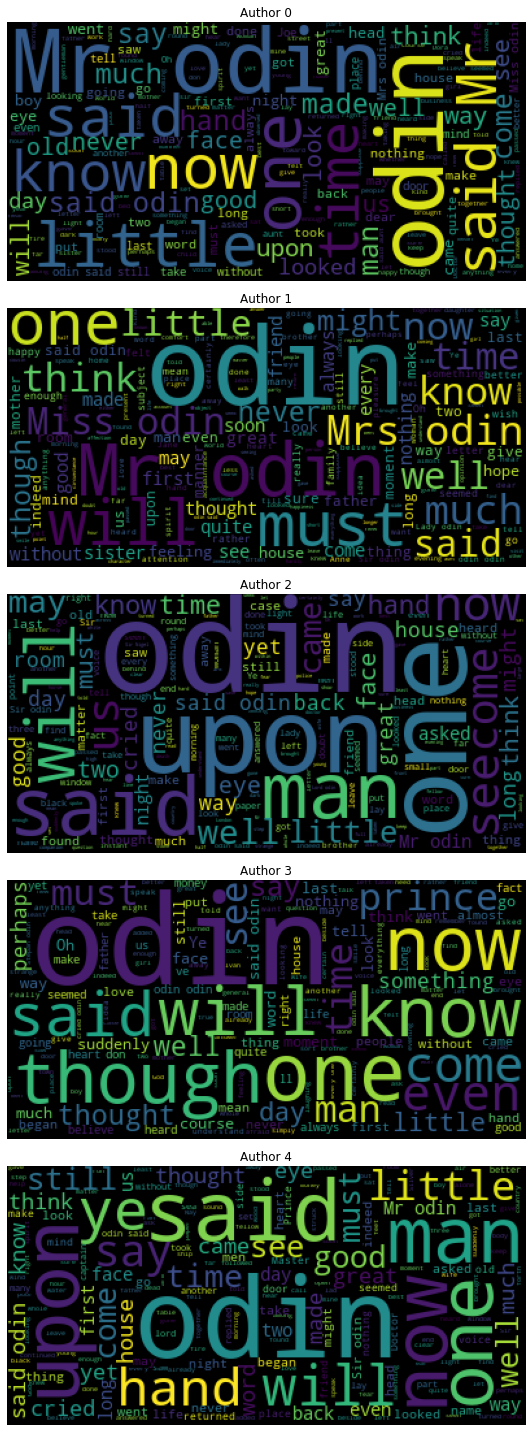

In [42]:
# 워드클라우드 시각화
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,20), constrained_layout=True)

ax1=fig.add_subplot(5,1,1)
ax1.imshow(author0_wc)
ax1.set_title('Author 0')
ax1.axis('off')

ax2=fig.add_subplot(5,1,2)
ax2.imshow(author1_wc)
ax2.set_title('Author 1')
ax2.axis('off')

ax3=fig.add_subplot(5,1,3)
ax3.imshow(author2_wc)
ax3.set_title('Author 2')
ax3.axis('off')

ax4=fig.add_subplot(5,1,4)
ax4.imshow(author3_wc)
ax4.set_title('Author 3')
ax4.axis('off')

ax5=fig.add_subplot(5,1,5)
ax5.imshow(author4_wc)
ax5.set_title('Author 4')
ax5.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
stopwords.append('odin')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# 불용어 제거해주는 함수
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

# 불용어
# stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
#              "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", 
#              "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", 
#              "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
#              "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
#              "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
#              "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
#              "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
#              "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
#              "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
#              "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [ ]:
#from nltk.stem.porter import PorterStemmer
#stemmer = PorterStemmer()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

In [ ]:
# 어간추출
def stemming(text):
    final_text = []
    for i in text.split():
      final_text.append(stemmer.stem(i))
    return " ".join(final_text)

In [ ]:
#전처리 적용
train['text'] = train['text'].str.lower()
test['text'] = test['text'].str.lower()
train['text'] = train['text'].apply(alpha_num).apply(remove_stopwords).apply(stemming)
test['text'] = test['text'].apply(alpha_num).apply(remove_stopwords).apply(stemming)

In [ ]:
# train test 분리
X_train = np.array([x for x in train['text']])
X_test = np.array([x for x in test['text']])
y_train = np.array([x for x in train['author']])

In [ ]:
X_train

array(['almost choke much much want say strang exclam came lip pole gaze fix bundl note hand look evid perplex',
       'sister ask suppos',
       'engag one day walk perus jane last letter dwell passag prove jane written spirit instead surpris mr saw look meet put away letter immedi forc smile said',
       ..., 'sincer wellwish friend sister luci', 'want lend money',
       'certain occur said yes like'], dtype='<U1250')

# **모델링**

In [ ]:
#파라미터 설정
vocab_size = 20000
embedding_dim = 16
max_length = 500
padding_type='post'
#oov_tok = "<OOV>"

In [ ]:
#tokenizer에 fit
tokenizer = Tokenizer(num_words = vocab_size)#, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [ ]:
#데이터를 sequence로 변환해주고 padding 해줍니다.
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
#가벼운 NLP모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 125       
Total params: 320,533
Trainable params: 320,533
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit model
num_epochs = 20
history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2)

Epoch 1/20
1371/1371 - 8s - loss: 1.5648 - accuracy: 0.2769 - val_loss: 1.5484 - val_accuracy: 0.3642
Epoch 2/20
1371/1371 - 8s - loss: 1.4199 - accuracy: 0.3919 - val_loss: 1.3111 - val_accuracy: 0.4465
Epoch 3/20
1371/1371 - 8s - loss: 1.2305 - accuracy: 0.4870 - val_loss: 1.1912 - val_accuracy: 0.5061
Epoch 4/20
1371/1371 - 8s - loss: 1.1292 - accuracy: 0.5373 - val_loss: 1.1213 - val_accuracy: 0.5408
Epoch 5/20
1371/1371 - 8s - loss: 1.0631 - accuracy: 0.5689 - val_loss: 1.0942 - val_accuracy: 0.5460
Epoch 6/20
1371/1371 - 8s - loss: 1.0088 - accuracy: 0.5970 - val_loss: 1.0551 - val_accuracy: 0.5800
Epoch 7/20
1371/1371 - 8s - loss: 0.9623 - accuracy: 0.6186 - val_loss: 1.0043 - val_accuracy: 0.5993
Epoch 8/20
1371/1371 - 8s - loss: 0.9196 - accuracy: 0.6391 - val_loss: 0.9914 - val_accuracy: 0.6043
Epoch 9/20
1371/1371 - 8s - loss: 0.8821 - accuracy: 0.6557 - val_loss: 0.9582 - val_accuracy: 0.6240
Epoch 10/20
1371/1371 - 8s - loss: 0.8504 - accuracy: 0.6723 - val_loss: 0.9367 - 

In [ ]:
# predict values
pred = model.predict_proba(test_padded)

Instructions for updating:
Please use `model.predict()` instead.


In [ ]:
pred

array([[5.45481779e-02, 3.60316694e-01, 1.42886162e-01, 3.25145513e-01,
        1.17103495e-01],
       [1.38495177e-01, 2.53506899e-01, 2.03857899e-01, 9.23413709e-02,
        3.11798662e-01],
       [9.45326388e-01, 3.87876555e-02, 1.02055519e-05, 4.30331824e-08,
        1.58757158e-02],
       ...,
       [6.62145345e-03, 9.93291140e-01, 2.43927417e-07, 5.63018693e-05,
        3.07316004e-05],
       [1.33522451e-02, 9.86491084e-01, 3.21760666e-07, 5.97152120e-06,
        1.50324951e-04],
       [9.97736692e-01, 1.61425909e-03, 1.28907544e-04, 1.91255640e-05,
        5.01014059e-04]], dtype=float32)

In [ ]:
# submission
sample_submission[['0','1','2','3','4']] = pred
sample_submission

,index,0,1,2,3,4
0,0,5.454818e-02,3.603167e-01,1.428862e-01,3.251455e-01,1.171035e-01
1,1,1.384952e-01,2.535069e-01,2.038579e-01,9.234137e-02,3.117987e-01
2,2,9.453264e-01,3.878766e-02,1.020555e-05,4.303318e-08,1.587572e-02
3,3,8.217471e-08,6.385579e-12,9.996439e-01,3.481666e-04,7.724630e-06
4,4,7.771854e-01,1.762709e-01,8.297974e-03,2.399269e-02,1.425301e-02
...,...,...,...,...,...,...
19612,19612,4.230514e-07,9.999995e-01,1.357004e-21,1.779284e-12,3.024338e-16
19613,19613,8.303924e-03,1.356276e-04,2.937342e-03,1.000904e-09,9.886231e-01
19614,19614,6.621453e-03,9.932911e-01,2.439274e-07,5.630187e-05,3.073160e-05
19615,19615,1.335225e-02,9.864911e-01,3.217607e-07,5.971521e-06,1.503250e-04


In [ ]:
sample_submission.to_csv('snow_submission03.csv', index = False, encoding = 'utf-8')